# 0. Introduction

In [1]:
%pylab inline
from IPython.display import Audio
style.use('seaborn') #more beautiful plots

Populating the interactive namespace from numpy and matplotlib


## About Plotting Signals

In [2]:
fs = 30. #sample rate
T = 1. #duration in seconds
N = int(T*fs) #number of samples
n = arange(N) #sample index array
t = n/fs #time index array

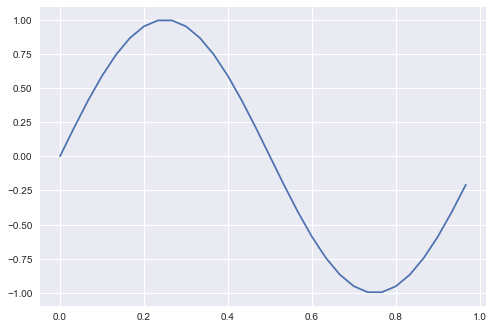

In [3]:
f = 1 #Freq in Hz
x = sin(2*pi*t*f)
plot(t,x)
show()

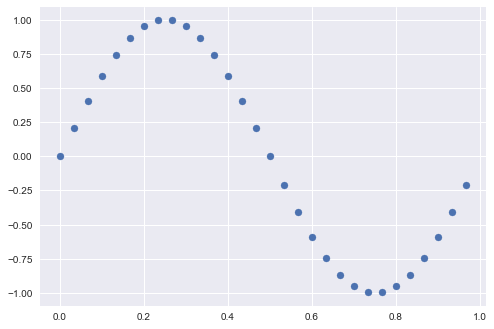

In [4]:
scatter(t,x)
show()

C:\Users\hrtlacek\Anaconda3\envs\td1\lib\site-packages\ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


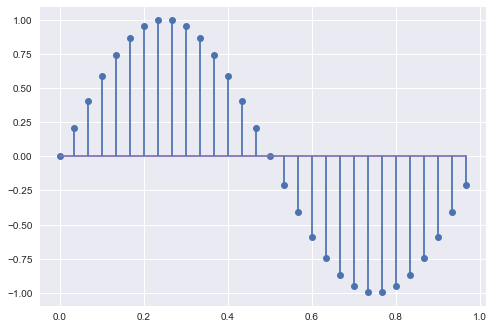

In [5]:
stem(t,x)
show()

## Aliasing

In [6]:
# For plotting the original signal, we use an adequate sampling rate (fs_h =30Hz)
fs_h = 70. #sample rate
T = 1. #duration in seconds
N_h = int(T*fs_h) #number of samples
n_h = arange(N_h) #sample index array
t_h = n_h/fs_h #time index array

# For showing the effect of aliasing we use a low sampling rate (fs_l = 4Hz)
fs_l = 4. #sample rate
N_l = int(T*fs_l) #number of samples
n_l = arange(N_l) #sample index array
t_l = n_l/fs_l #time index array


In [7]:
def alias(f, sr):
  nyq = sr/2
  fout = f%nyq #get the aliased frequency
  fout*=(1+((floor(f/nyq))%2)*-2) #correct phase every second round
  return fout

C:\Users\hrtlacek\Anaconda3\envs\td1\lib\site-packages\ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


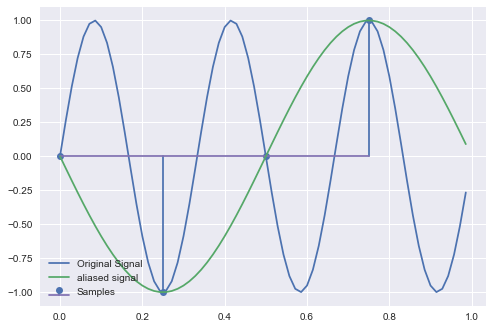

In [8]:
f = 3 #Hz, try different values here!
x1 = sin(2*pi*t_h*f)
sampled = sin(2*pi*t_l*f)
# Nyq_l = fs_l/2
aliasedFeq = alias(f,fs_l)
aliased = sin(2*pi*t_h*aliasedFeq)
plot(t_h,x1, label='Original Signal')
stem(t_l,sampled, label='Samples')
plot(t_h,aliased, label='aliased signal')
legend(loc=3)
show()

### Aliasing shown in the frequency Domain

In [9]:
import scipy.signal as sig

We create a sine sweep that goes up to nyquist frequency, $f_n$. We encounter no aliasing. We see this in the spectrogram and we can hear it. When I listen to this on my cheap laptop speakers I can hear my cheap laptop's convert **is** in fact aliasing.
If no aliasing accurs in you system, you should just hear a clean sine wave raising in Frequency.

In [10]:
sr = 44100
T = 20
N = sr*T
n = arange(N)
t = n/sr
nyquist = sr/2
sweep = sig.chirp(t,20,T,nyquist)

In [11]:
Audio(data=sweep, rate=sr)

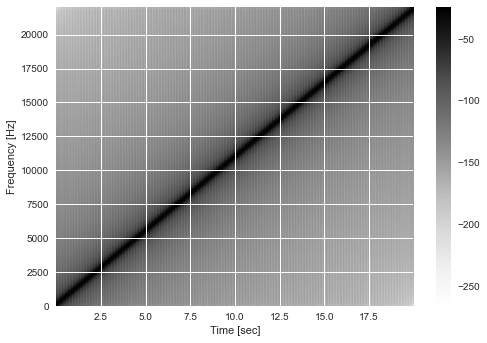

In [12]:
specgram(sweep, Fs=sr)
ylabel('Frequency [Hz]')
xlabel('Time [sec]')
colorbar()
show()

Now we create a sine sweep that goes up to the sampling rate, so above the nyquist rate. We can see and hear the reflection.

In [13]:
sweep = sig.chirp(t,20,T, sr)

In [14]:
Audio(data=sweep, rate=sr)

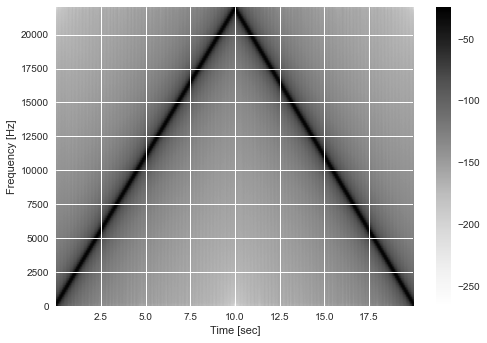

In [15]:
specgram(sweep, Fs=sr)
ylabel('Frequency [Hz]')
xlabel('Time [sec]')
colorbar()
show()